<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/deep_learning/deep_learning/red_agrupamiento/SOM_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapas auto organizados

## Carga de repositorio

In [1]:
!git clone https://github.com/cccg8105/deeplearning-az.git

from google.colab import drive
drive.mount('/content/drive')

Cloning into 'deeplearning-az'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 10185 (delta 48), reused 54 (delta 24), pack-reused 10096
Receiving objects: 100% (10185/10185), 237.00 MiB | 19.93 MiB/s, done.
Resolving deltas: 100% (73/73), done.
Checking out files: 100% (10113/10113), done.
Mounted at /content/drive


## Instalación de dependencias

In [2]:
!pip install sklearn
!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git
!pip install keras
!pip install tensorflow

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-bk3pzbf8
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-bk3pzbf8
  Created wheel for Theano: filename=Theano-1.0.5+1.geb6a4125c-cp36-none-any.whl size=2668281 sha256=a9823266a7eb3d43c9d48344065d061ccdec656e1896e52d0734d8f59bc70129
  Stored in directory: /tmp/pip-ephem-wheel-cache-w19_ohb2/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano
  Found existing installation: Theano 1.0.5
    Uninstalling Theano-1.0.5:
      Successfully uninstalled Theano-1.0.5


## Importar el data set

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/cccg8105/deeplearning-az/master/datasets/Part%204%20-%20Self%20Organizing%20Maps%20(SOM)/Credit_Card_Applications.csv')
# Caracteristicas
X = dataset.iloc[:, :-1].values
# 
y = dataset.iloc[:, -1].values

dataset.head(5)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


### Escalado de variables

In [5]:
from sklearn.preprocessing import MinMaxScaler
rangoEscala = (0, 1)
sc = MinMaxScaler(feature_range = rangoEscala)
X = sc.fit_transform(X)

## Creación de modelo y entrenamiento

In [6]:
import sys
sys.path.append('/content/deeplearning-az/datasets/Part 4 - Self Organizing Maps (SOM)')
from minisom import MiniSom
tamanioMapaX = 10
tamanioMapaY = 10
cantidadColumnsX = 15
ratioAprendizaje = 0.5
som = MiniSom(x = tamanioMapaX, y = tamanioMapaY, input_len = cantidadColumnsX, sigma = 1.0, learning_rate = ratioAprendizaje)
som.random_weights_init(X) # Inicializacion aleatoria

numeroIteraciones = 100
som.train_random(data = X, num_iteration = numeroIteraciones)

## Visualizar los resultados

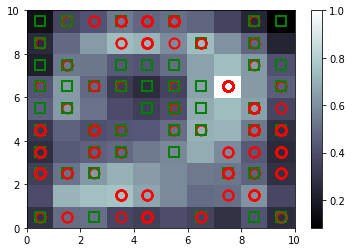

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
# Se crea la ventana del mapa auto-organizado
bone()
# rango de colores
pcolor(som.distance_map().T)
# genera una barra indicador del indice de distancias medias
# A mayor distancia media las cuadriculas se veran mas claras (atipicos)
colorbar()

# crear marcadores circulos y cuadrados
markers = ['o', 's']
# se definen colores de cada marcador
colors = ['r', 'g']
tamanioMarcador = 10
anchoMarcador = 2
# Se recorren los clientes para marcarlos en el mapa
for i, x in enumerate(X):
    # se optiene ubicacion del cliente en el mapa
    w = som.winner(x)
    # se dibuja el marcador del cliente 
    plot(w[0]+0.5, w[1]+0.5,
         markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', 
         markersize = tamanioMarcador, markeredgewidth = anchoMarcador)
show()


## Detección de fraudes

In [13]:
mappings = som.win_map(X)
len(mappings)
# union de los posibles nodos que pueden ser fraude
frauds = np.concatenate( (mappings[(8,7)], mappings[(4,9)]), axis = 0 )
frauds = sc.inverse_transform(frauds)

print(frauds)

[[1.5808662e+07 0.0000000e+00 4.6000000e+01 4.0000000e+00 2.0000000e+00
  5.0000000e+00 3.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.0000000e+02 9.6100000e+02]
 [1.5757188e+07 0.0000000e+00 2.0830000e+01 3.0000000e+00 2.0000000e+00
  6.0000000e+00 4.0000000e+00 4.0000000e-02 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.0000000e+02 1.0000000e+00]
 [1.5776545e+07 0.0000000e+00 2.5000000e+01 1.1000000e+01 1.0000000e+00
  6.0000000e+00 4.0000000e+00 4.5000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.2000000e+02 1.0000000e+00]
 [1.5793896e+07 0.0000000e+00 2.8420000e+01 3.5000000e+00 2.0000000e+00
  9.0000000e+00 4.0000000e+00 8.3500000e-01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 2.8000000e+02 1.0000000e+00]
 [1.5594305e+07 0.0000000e+00 2.3750000e+01 7.1000000e-01 2.0000000e+00
  9.0000000e+00 4.0000000e+00 2.5000000e-01 0.0000000e+00 1.

## Complementar modelo con una red neuronal supervisada

### Creación de datos de entrenamiento

In [18]:
from keras.models import Sequential
from keras.layers import Dense

# matriz de características
customers = dataset.iloc[:, 1:-1].values

# variable dependiente
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
customers = sc_X.fit_transform(customers)

### Construcción de la RNA

In [19]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# capas de entrada y primera capa oculta
classifier.add(Dense(units = 2, kernel_initializer = "uniform",  activation = "relu", input_dim = 14))

# capa de salida
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))


### Compilación

In [20]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


### Entrenamiento 

In [21]:
classifier.fit(customers, is_fraud,  batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 1s 824us/step - loss: 0.4605 - accuracy: 0.9725
Epoch 2/2
690/690 [==============================] - 1s 793us/step - loss: 0.1525 - accuracy: 0.9739


### Predicción de resultados

In [23]:
y_pred  = classifier.predict(customers)
# se concatena el id del cliente con las predicciones
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)

y_pred = y_pred[y_pred[:,1].argsort()]

y_pred

array([[1.57997850e+07, 1.29020214e-03],
       [1.56548590e+07, 2.74100900e-03],
       [1.56214230e+07, 3.34593654e-03],
       ...,
       [1.56647930e+07, 2.40054548e-01],
       [1.56458200e+07, 2.74255812e-01],
       [1.57257760e+07, 3.26584905e-01]])